In [1]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import sklearn 
from scipy.stats import skew
import scipy
from bioinfokit.analys import stat
import seaborn as sns
import pandas as pd

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import random
random.seed(10)
env=gym.make('Blackjack-v0')
env.reset()

(9, 10, False)

In [5]:
env.action_space.n

2

In [6]:
env.observation_space

Tuple(Discrete(32), Discrete(11), Discrete(2))

In [7]:
env.action_space

Discrete(2)

In [8]:
env.step(0)

((21, 10, True), 1.0, True, {})

In [9]:
env.reset()
env.step(1)

((11, 10, False), 0.0, False, {})

In [10]:
print(env.reset())
print("GGGGGGGG")
env.step(1)

(14, 3, False)
GGGGGGGG


((24, 3, False), -1.0, True, {})

Player current sum, Dealer one card, whether or not the player holds a usable ace (0 or 1).\\
State,Reward,Is_done\n
0 for exit and 1 for continue\n
1 for win, -1 for loss, 0 for draw\n



    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with dealer having one face up and one face down card, while
    player having two face up cards. (Virtually for all Blackjack games today).
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.

In [4]:
a={}
new_state=[]
B=[]
for i in range(0,1000):
    if i%100==0:
        print(i)
    state_1=env.reset()
    is_done=False
    while is_done==False:
        l=env.action_space.sample()
        state,reward,is_done,info=env.step(l)
        if state_1 not in new_state:
            a={'State':[state_1[0],state_1[1],state_1[2]]}
            a["Action"]=[l]
            a["Reward"]=[reward]
            a["is_done"]=[is_done]
            B.append(a)
            new_state.append(state_1)
        else:
            k=new_state.index(state_1)
            B[k]["Action"].append(l)
            B[k]["Reward"].append(reward)
            B[k]["is_done"].append(is_done)

0
100
200
300
400
500
600
700
800
900


In [12]:
b1=B

# Custom Function

In [13]:
def select_action(state_1=state_1,act=[0,1],data=b1,epsilion=0.001,new_state=new_state):
    x=np.random.choice(
        ['random','algorithm'], 
        p=[epsilion,1-epsilion]
    )
    if x=='random':
        l=env.action_space.sample()
    else:
        if state_1 not in new_state:
            x="Not_found"
            l=env.action_space.sample()
        else:
            k=new_state.index(state_1)
            c={"0":0,"1":0}
            d=data[k]
            aa=1
            bb=1
            for i in range(0,len(d["Action"])):
                if d["Action"][i]==1:
                    c["1"]+=d["Reward"][i]
                    aa+=1
                else:
                    c["0"]+=d["Reward"][i]
                    bb+=1
            
            if (c["1"]/aa)>=(c["0"]/bb):
                l=1
            else:
                l=0
    
    state,reward,is_done,info=env.step(l)
    if state_1 not in new_state:
            a={'State':[state_1[0],state_1[1],state_1[2]]}
            a["Action"]=[l]
            a["Reward"]=[reward]
            a["is_done"]=[is_done]
            data.append(a)
            new_state.append(state_1)
    else:
        k=new_state.index(state_1)
        data[k]["Action"].append(l)
        data[k]["Reward"].append(reward)
        data[k]["is_done"].append(is_done)
    return new_state,data,reward,is_done,l
new_state,b1,reward,is_done,l=select_action()

In [14]:
w1=[]
l1=[]
d1=[]
w1.append(0)
d1.append(0)
l1.append(0)
for i in range(0,1000):
    state_1=env.reset()   
    is_done=False
    while is_done==False:
        new_state,b1,reward,is_done,l=select_action(epsilion=0.1)
    if reward==1:
        w1[len(w1)-1]+=1
    elif reward==0:
        d1[len(d1)-1]+=1
    else:
        l1[len(l1)-1]+=1
    if i%100==0 and i!=0:
        w1.append(0)
        d1.append(0)
        l1.append(0)
print(w1,l1,d1)

[38, 47, 35, 42, 40, 44, 40, 36, 39, 38] [57, 52, 55, 54, 54, 53, 55, 61, 56, 55] [6, 1, 10, 4, 6, 3, 5, 3, 5, 6]


In [15]:
print( '\n Skewness for data : ', skew(w1))
print( '\n Skewness for data : ', skew(l1))
print( '\n Skewness for data : ', skew(d1))


 Skewness for data :  0.5967957062894278

 Skewness for data :  1.1789215914688485

 Skewness for data :  0.5168077586915419


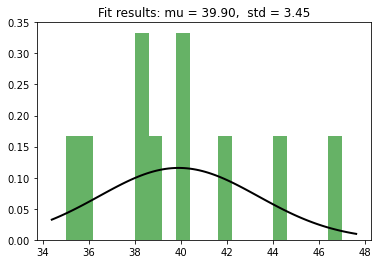

In [16]:
mu, std = norm.fit(w1)
plt.hist(w1, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

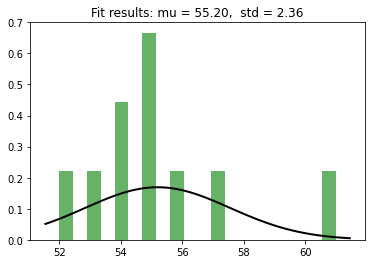

In [17]:
mu, std = norm.fit(l1)
plt.hist(l1, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

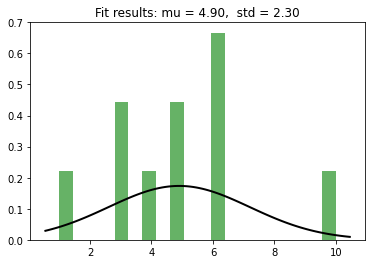

In [18]:
mu, std = norm.fit(d1)
plt.hist(d1, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [19]:
w21=[]
l21=[]
d21=[]
w21.append(0)
d21.append(0)
l21.append(0)
b1=B
for i in range(0,1000):
    state_1=env.reset()   
    is_done=False
    while is_done==False:
        new_state,b1,reward,is_done,l=select_action()
    if reward==1:
        w21[len(w21)-1]+=1
    elif reward==0:
        d21[len(d21)-1]+=1
    else:
        l21[len(l21)-1]+=1
    if i%100==0 and i!=0:
        w21.append(0)
        d21.append(0)
        l21.append(0)
print(w21,l21,d21)

[43, 35, 31, 42, 34, 38, 41, 27, 46, 30] [51, 60, 66, 54, 59, 57, 56, 67, 50, 60] [7, 5, 3, 4, 7, 5, 3, 6, 4, 9]


In [20]:
print( '\n Skewness for data : ', skew(w21))
print( '\n Skewness for data : ', skew(l21))
print( '\n Skewness for data : ', skew(d21))


 Skewness for data :  -0.06505426352652505

 Skewness for data :  0.2135134353515424

 Skewness for data :  0.5088162102289503


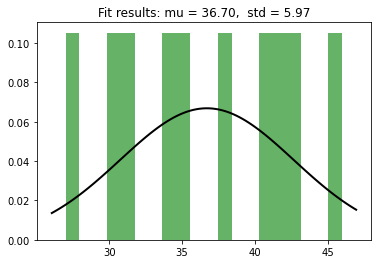

In [21]:
mu, std = norm.fit(w21)
plt.hist(w21, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

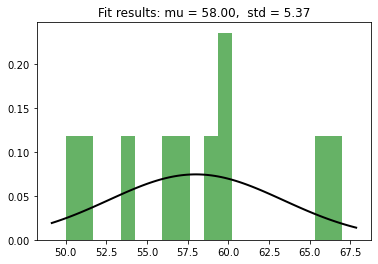

In [22]:
mu, std = norm.fit(l21)
plt.hist(l21, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

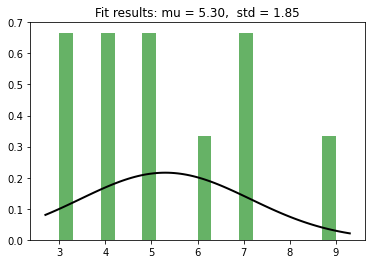

In [23]:
mu, std = norm.fit(d21)
plt.hist(d21, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\PreetinderPall Singh\Anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


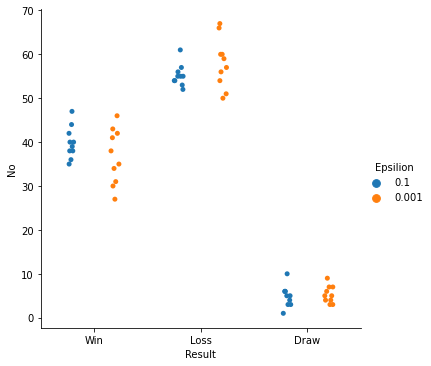

In [24]:
df=pd.DataFrame(columns=["No","Result","Epsilion"])
for i in w1:
    df=df.append({"No":int(i),"Result":"Win","Epsilion":"0.1"},ignore_index=True)
for i in l1:
    df=df.append({"No":int(i),"Result":"Loss","Epsilion":"0.1"},ignore_index=True)
for i in d1:
    df=df.append({"No":int(i),"Result":"Draw","Epsilion":"0.1"},ignore_index=True)
for i in w21:
    df=df.append({"No":int(i),"Result":"Win","Epsilion":"0.001"},ignore_index=True)
for i in l21:
    df=df.append({"No":int(i),"Result":"Loss","Epsilion":"0.001"},ignore_index=True)
for i in d21:
    df=df.append({"No":int(i),"Result":"Draw","Epsilion":"0.001"},ignore_index=True)
sns.catplot(x="Result",y="No",hue="Epsilion",split=True,data=df)

<AxesSubplot:xlabel='Result', ylabel='No'>

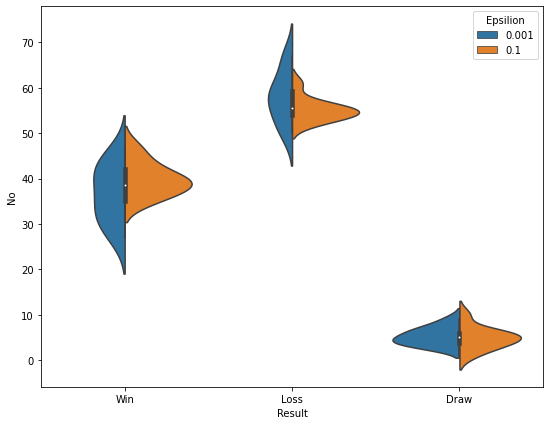

In [25]:
fig, ax = plt.subplots(figsize =(9, 7))
df['No']=df['No'].astype('float64')
df['Epsilion']=df['Epsilion'].astype('category')
sns.violinplot(ax=ax,y="No",x="Result",hue="Epsilion",split=True,data=df)

In [26]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset()   
    new_state,b1,reward,is_done,action=select_action(epsilion=0.1)
    while is_done==False:
        new_state,b1,reward,is_done,l=select_action(epsilion=0.1)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
        

In [27]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,15,0,0.329412,0.670588,0.0
1,10,0,0.26087,0.73913,0.0
2,12,0,0.277778,0.722222,0.0
3,20,1,0.0,1.0,0.0
4,21,0,0.9375,0.0,0.0625
5,20,0,0.72807,0.114035,0.157895
6,17,0,0.266667,0.566667,0.166667
7,4,0,0.0,1.0,0.0
8,7,0,0.333333,0.666667,0.0
9,9,0,0.40625,0.59375,0.0


<AxesSubplot:xlabel='Sum', ylabel='Win'>

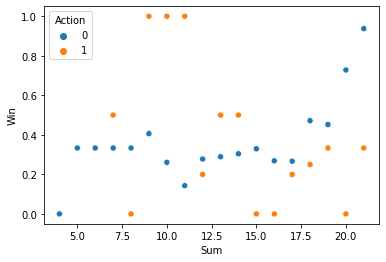

In [28]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

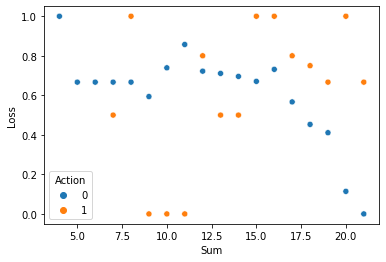

In [29]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

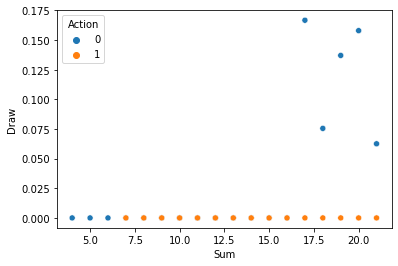

In [30]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

# 18

In [31]:
w2=[]
l2=[]
d2=[]
w2.append(0)
d2.append(0)
l2.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        if state_1[0]>=18:
            state,reward,is_done,info=env.step(0)
        else:
            #Fit
            state,reward,is_done,info=env.step(1)
    if reward==1:
        w2[len(w2)-1]+=1
    elif reward==0:
        d2[len(d2)-1]+=1
    else:
        l2[len(l2)-1]+=1
    if i%100==0 and i!=0:
        print(i )
        w2.append(0)
        d2.append(0)
        l2.append(0)
print(w2,l2,d2)

100
200
300
400
500
600
700
800
900
[20, 19, 25, 21, 13, 16, 19, 19, 18, 19] [74, 77, 72, 72, 79, 79, 77, 79, 80, 75] [7, 4, 3, 7, 8, 5, 4, 2, 2, 5]


In [32]:
print( '\n Skewness for data : ', skew(w2))
print( '\n Skewness for data : ', skew(l2))
print( '\n Skewness for data : ', skew(d2))


 Skewness for data :  0.027637807844613213

 Skewness for data :  -0.38214993814429127

 Skewness for data :  0.19128224345590628


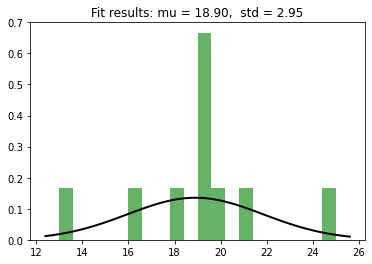

In [33]:
mu, std = norm.fit(w2)
plt.hist(w2, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

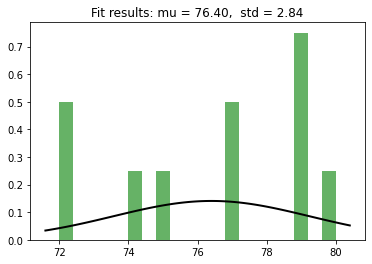

In [34]:
mu, std = norm.fit(l2)
plt.hist(l2, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

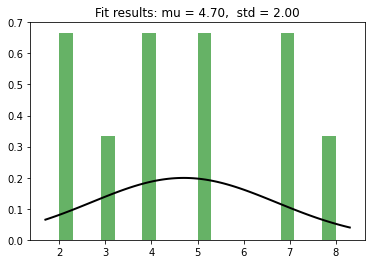

In [35]:
mu, std = norm.fit(d2)
plt.hist(d2, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [36]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset()   
    if state_1[0]>=18:
        state,reward,is_done,info=env.step(0)
        action=0
    else:
        state,reward,is_done,info=env.step(1)
        action=1
    while is_done==False:
        if state[0]<18:
            state,reward,is_done,info=env.step(0)
        else:
            state,reward,is_done,info=env.step(1)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)
        

0
100
200
300
400
500
600
700
800
900


In [37]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,17,1,0.027027,0.972973,0.0
1,13,1,0.10989,0.89011,0.0
2,20,0,0.71028,0.196262,0.093458
3,14,1,0.075,0.9125,0.0125
4,19,0,0.551724,0.362069,0.086207
5,15,1,0.069767,0.918605,0.011628
6,18,0,0.444444,0.428571,0.126984
7,4,1,0.0,1.0,0.0
8,21,0,0.859375,0.0,0.140625
9,6,1,0.578947,0.421053,0.0


<AxesSubplot:xlabel='Sum', ylabel='Win'>

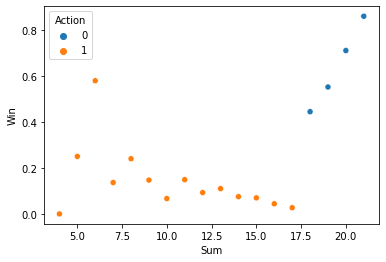

In [38]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

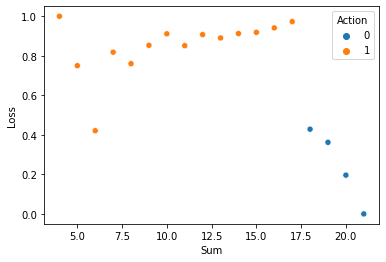

In [39]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

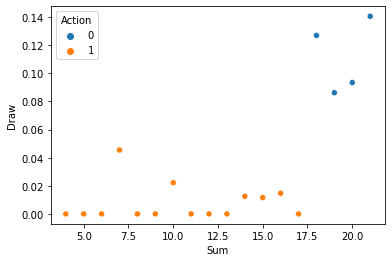

In [40]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

# 16

In [41]:
w3=[]
l3=[]
d3=[]
w3.append(0)
d3.append(0)
l3.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        if state_1[0]>=16:
            state,reward,is_done,info=env.step(0)
        else:
            #Fit
            state,reward,is_done,info=env.step(1)
    if reward==1:
        w3[len(w3)-1]+=1
    elif reward==0:
        d3[len(d3)-1]+=1
    else:
        l3[len(l3)-1]+=1
    if i%100==0 and i!=0:
        w3.append(0)
        d3.append(0)
        l3.append(0)
print(w3,l3,d3)

[27, 16, 24, 18, 20, 19, 27, 20, 30, 25] [70, 78, 72, 80, 71, 77, 67, 76, 65, 71] [4, 6, 4, 2, 9, 4, 6, 4, 5, 3]


In [42]:
print( '\n Skewness for data : ', skew(w3))
print( '\n Skewness for data : ', skew(l3))
print( '\n Skewness for data : ', skew(d3))


 Skewness for data :  0.14873231201868323

 Skewness for data :  -0.018156941054623555

 Skewness for data :  0.9204428072680999


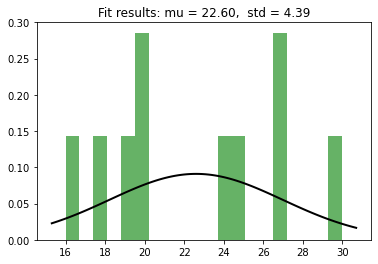

In [43]:
mu, std = norm.fit(w3)
plt.hist(w3, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

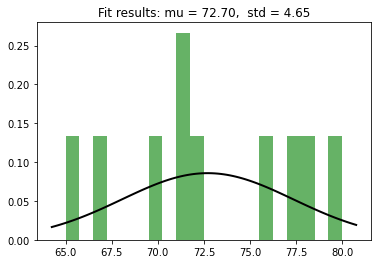

In [44]:
mu, std = norm.fit(l3)
plt.hist(l3, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

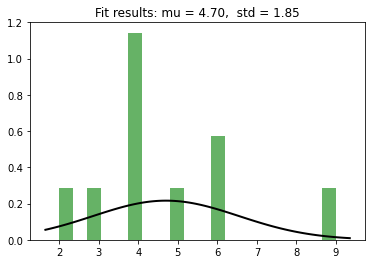

In [45]:
mu, std = norm.fit(d3)
plt.hist(d3, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## 19

In [46]:
w4=[]
l4=[]
d4=[]
w4.append(0)
d4.append(0)
l4.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        if state_1[0]>=19:
            state,reward,is_done,info=env.step(0)
        else:
            #Fit
            state,reward,is_done,info=env.step(1)
    if reward==1:
        w4[len(w4)-1]+=1
    elif reward==0:
        d4[len(d4)-1]+=1
    else:
        l4[len(l4)-1]+=1
    if i%100==0 and i!=0:
        w4.append(0)
        d4.append(0)
        l4.append(0)
print(w4,l4,d4)

[19, 14, 19, 14, 10, 15, 14, 10, 17, 13] [76, 85, 79, 83, 84, 81, 83, 88, 80, 83] [6, 1, 2, 3, 6, 4, 3, 2, 3, 3]


In [47]:
print( '\n Skewness for data : ', skew(w4))
print( '\n Skewness for data : ', skew(l4))
print( '\n Skewness for data : ', skew(d4))


 Skewness for data :  0.04407662952361548

 Skewness for data :  -0.18230802527242818

 Skewness for data :  0.6158244262354834


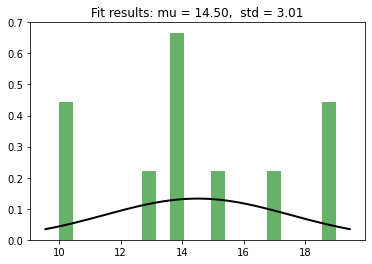

In [48]:
mu, std = norm.fit(w4)
plt.hist(w4, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

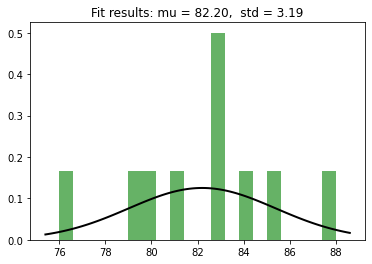

In [49]:
mu, std = norm.fit(l4)
plt.hist(l4, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

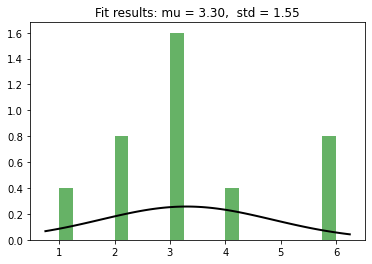

In [50]:
mu, std = norm.fit(d4)
plt.hist(d4, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\PreetinderPall Singh\Anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


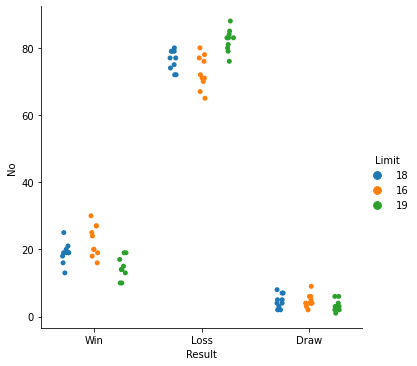

In [51]:
df=pd.DataFrame(columns=["No","Result","Epsilion"])
for i in w2:
    df=df.append({"No":int(i),"Result":"Win","Limit":"18"},ignore_index=True)
for i in l2:
    df=df.append({"No":int(i),"Result":"Loss","Limit":"18"},ignore_index=True)
for i in d2:
    df=df.append({"No":int(i),"Result":"Draw","Limit":"18"},ignore_index=True)
for i in w3:
    df=df.append({"No":int(i),"Result":"Win","Limit":"16"},ignore_index=True)
for i in l3:
    df=df.append({"No":int(i),"Result":"Loss","Limit":"16"},ignore_index=True)
for i in d3:
    df=df.append({"No":int(i),"Result":"Draw","Limit":"16"},ignore_index=True)
for i in w4:
    df=df.append({"No":int(i),"Result":"Win","Limit":"19"},ignore_index=True)
for i in l4:
    df=df.append({"No":int(i),"Result":"Loss","Limit":"19"},ignore_index=True)
for i in d4:
    df=df.append({"No":int(i),"Result":"Draw","Limit":"19"},ignore_index=True)
sns.catplot(x="Result",y="No",hue="Limit",split=True,data=df)

In [170]:
w22=[]
l22=[]
d22=[]
w22.append(0)
d22.append(0)
l22.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        if state_1[0]<12:
            state,reward,is_done,info=env.step(0)
        else:
            #Fit
            state,reward,is_done,info=env.step(1)
    if reward==1:
        w22[len(w22)-1]+=1
    elif reward==0:
        d22[len(d22)-1]+=1
    else:
        l22[len(l22)-1]+=1
    if i%100==0 and i!=0:
        w22.append(0)
        d22.append(0)
        l22.append(0)
        print(i)
print(w22,l22,d22)

100
200
300
400
500
600
700
800
900
[3, 7, 7, 7, 6, 3, 5, 3, 2, 3] [98, 93, 93, 93, 94, 97, 95, 97, 98, 96] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [171]:
print( '\n Skewness for data : ', skew(w22))
print( '\n Skewness for data : ', skew(l22))
print( '\n Skewness for data : ', skew(d22))


 Skewness for data :  0.14860301531552517

 Skewness for data :  -0.00956831930775551

 Skewness for data :  0.0


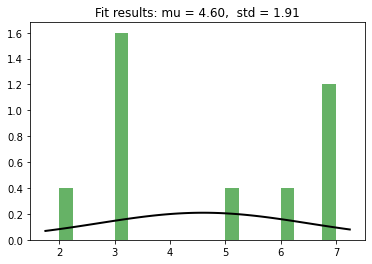

In [172]:
mu, std = norm.fit(w22)
plt.hist(w22, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

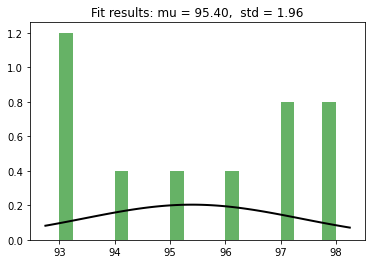

In [173]:
mu, std = norm.fit(l22)
plt.hist(l22, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

C:\Users\PreetinderPall Singh\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


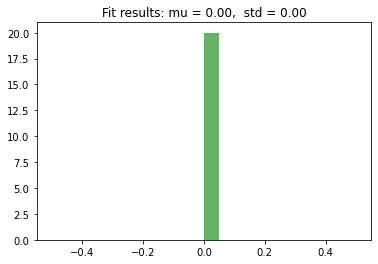

In [174]:
mu, std = norm.fit(d22)
plt.hist(d22, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Model 1

In [5]:
df_1=pd.DataFrame(columns=["Sum","Action","Reward"])
for i in range(0,len(B)):
    for j in range(0,len(B[i]["Action"])):
        df_1=df_1.append({"Sum":B[i]["State"][0],"Action":B[i]["Action"][j],"Reward":B[i]["Reward"][j]},ignore_index=True)
y = pd.get_dummies(df_1.Sum, prefix='Sum')
y["Action"]=df_1.Action
X=y
Y=pd.get_dummies(df_1.Reward, prefix='Reward')

In [6]:
X

,Sum_4.0,Sum_5.0,Sum_6.0,Sum_7.0,Sum_8.0,Sum_9.0,Sum_10.0,Sum_11.0,Sum_12.0,Sum_13.0,Sum_14.0,Sum_15.0,Sum_16.0,Sum_17.0,Sum_18.0,Sum_19.0,Sum_20.0,Sum_21.0,Action
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1373,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1374,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0


In [7]:
Y

,Reward_-1.0,Reward_0.0,Reward_1.0
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
1372,1,0,0
1373,1,0,0
1374,1,0,0
1375,0,1,0


In [8]:
X=np.array(X)
Y=np.array(Y)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y,epochs=20,validation_split=0.2)

Epoch 1/20
111/111 [==============================] - 6s 35ms/step - loss: 0.3457 - accuracy: 0.2668 - val_loss: 0.2084 - val_accuracy: 0.5085
Epoch 2/20
111/111 [==============================] - 1s 7ms/step - loss: 0.1784 - accuracy: 0.5670 - val_loss: 0.1917 - val_accuracy: 0.5333
Epoch 3/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1773 - accuracy: 0.5665 - val_loss: 0.1858 - val_accuracy: 0.5582
Epoch 4/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1761 - accuracy: 0.5621 - val_loss: 0.1827 - val_accuracy: 0.5593
Epoch 5/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1760 - accuracy: 0.5677 - val_loss: 0.1807 - val_accuracy: 0.5842
Epoch 6/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1741 - accuracy: 0.5780 - val_loss: 0.1785 - val_accuracy: 0.5774
Epoch 7/20
111/111 [==============================] - 1s 7ms/step - loss: 0.1753 - accuracy: 0.5725 - val_loss: 0.1792 - val_accuracy: 0.5864
Epoch

In [62]:
w5=[]
l5=[]
d5=[]
w5.append(0)
d5.append(0)
l5.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    state=state_1
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]<=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w5[len(w5)-1]+=1
    elif reward==0:
        d5[len(d5)-1]+=1
    else:
        l5[len(l5)-1]+=1
    if i%100==0 and i!=0:
        print(i)
        w5.append(0)
        d5.append(0)
        l5.append(0)
print(w5,l5,d5)

100
200
300
400
500
600
700
800
900
[29, 37, 31, 28, 29, 31, 32, 28, 35, 23] [68, 55, 64, 71, 68, 66, 61, 68, 61, 71] [4, 8, 5, 1, 3, 3, 7, 4, 4, 5]


In [63]:
print( '\n Skewness for data : ', skew(w5))
print( '\n Skewness for data : ', skew(l5))
print( '\n Skewness for data : ', skew(d5))


 Skewness for data :  -0.014730967712849975

 Skewness for data :  -0.737053175868732

 Skewness for data :  0.2833824943226281


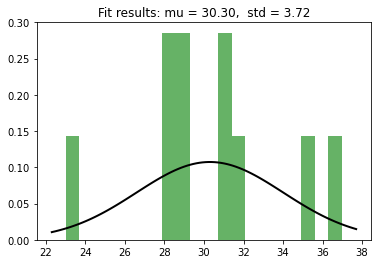

In [64]:
mu, std = norm.fit(w5)
plt.hist(w5, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

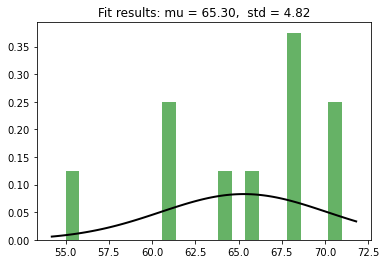

In [65]:
mu, std = norm.fit(l5)
plt.hist(l5, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

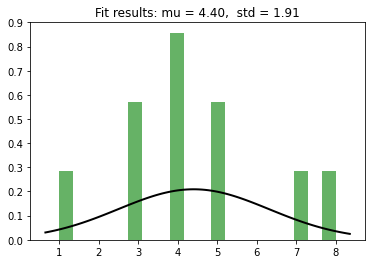

In [66]:
mu, std = norm.fit(d5)
plt.hist(d5, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [67]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset() 
    a=[]
    b=[]
    for j in range(4,22):
        if j==state_1[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=model.predict(c)
    y=model.predict(e)
    if x[0][0]<=y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]<=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900


In [68]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,12,1,0.247059,0.670588,0.082353
1,19,1,0.127273,0.854545,0.018182
2,13,1,0.212766,0.755319,0.031915
3,8,1,0.21875,0.75,0.03125
4,17,1,0.212766,0.776596,0.010638
5,20,0,0.741573,0.067416,0.191011
6,9,1,0.230769,0.74359,0.025641
7,11,1,0.465116,0.488372,0.046512
8,14,1,0.16129,0.827957,0.010753
9,15,1,0.204819,0.73494,0.060241


<AxesSubplot:xlabel='Sum', ylabel='Win'>

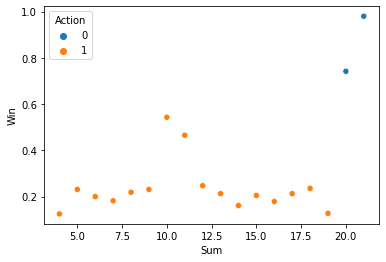

In [69]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

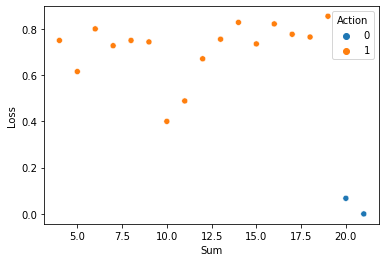

In [70]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

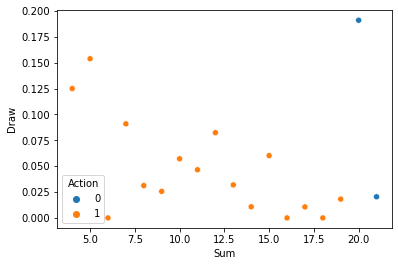

In [71]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

C:\Users\PreetinderPall Singh\Anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


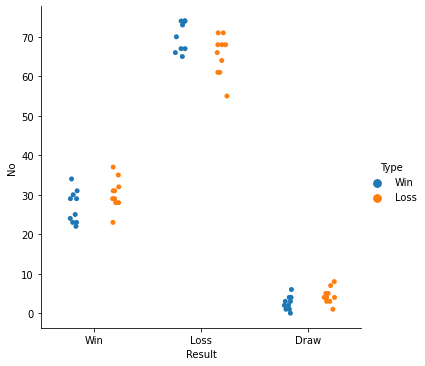

In [168]:
df=pd.DataFrame(columns=["No","Result","Epsilion"])
for i in w16:
    df=df.append({"No":int(i),"Result":"Win","Type":"Win"},ignore_index=True)
for i in l16:
    df=df.append({"No":int(i),"Result":"Loss","Type":"Win"},ignore_index=True)
for i in d16:
    df=df.append({"No":int(i),"Result":"Draw","Type":"Win"},ignore_index=True)
for i in w5:
    df=df.append({"No":int(i),"Result":"Win","Type":"Loss"},ignore_index=True)
for i in l5:
    df=df.append({"No":int(i),"Result":"Loss","Type":"Loss"},ignore_index=True)
for i in d5:
    df=df.append({"No":int(i),"Result":"Draw","Type":"Loss"},ignore_index=True)
sns.catplot(x="Result",y="No",hue="Type",split=True,data=df)

<AxesSubplot:xlabel='Result', ylabel='No'>

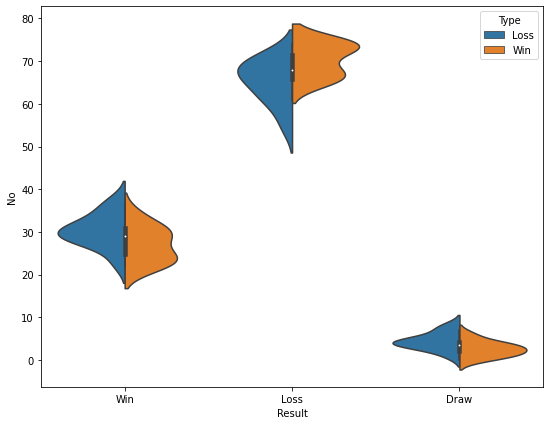

In [169]:
fig, ax = plt.subplots(figsize =(9, 7))
df['No']=df['No'].astype('float64')
df['Type']=df['Type'].astype('category')
sns.violinplot(ax=ax,y="No",x="Result",hue="Type",split=True,data=df)

# Model 2

In [79]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1280      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
_________________________________________________________________


In [80]:
df_1=pd.DataFrame(columns=["Sum","Action","Reward"])
for i in range(0,len(B)):
    for j in range(0,len(B[i]["Action"])):
        df_1=df_1.append({"Sum":B[i]["State"][0],"Action":B[i]["Action"][j],"Reward":B[i]["Reward"][j]},ignore_index=True)
y = pd.get_dummies(df_1.Sum, prefix='Sum')
y["Action"]=df_1.Action
X=y
Y=pd.get_dummies(df_1.Reward, prefix='Reward')
X=np.array(X)
Y=np.array(Y)

In [81]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X,Y,epochs=20,validation_split=0.2)

Epoch 1/20
111/111 [==============================] - 2s 10ms/step - loss: 0.1981 - accuracy: 0.4638 - val_loss: 0.1806 - val_accuracy: 0.5458
Epoch 2/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1765 - accuracy: 0.5590 - val_loss: 0.1702 - val_accuracy: 0.6068
Epoch 3/20
111/111 [==============================] - 1s 9ms/step - loss: 0.1742 - accuracy: 0.5757 - val_loss: 0.1680 - val_accuracy: 0.5831
Epoch 4/20
111/111 [==============================] - 1s 9ms/step - loss: 0.1737 - accuracy: 0.5627 - val_loss: 0.1647 - val_accuracy: 0.6113
Epoch 5/20
111/111 [==============================] - 1s 9ms/step - loss: 0.1744 - accuracy: 0.5698 - val_loss: 0.1652 - val_accuracy: 0.6169
Epoch 6/20
111/111 [==============================] - 1s 9ms/step - loss: 0.1752 - accuracy: 0.5613 - val_loss: 0.1662 - val_accuracy: 0.6169
Epoch 7/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1718 - accuracy: 0.5840 - val_loss: 0.1649 - val_accuracy: 0.6181
Epoch

In [82]:
w6=[]
l6=[]
d6=[]
w6.append(0)
d6.append(0)
l6.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    state=state_1
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]<y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    
    if reward==1:
        w6[len(w6)-1]+=1
    elif reward==0:
        d6[len(d6)-1]+=1
    else:
        l6[len(l6)-1]+=1
    if i%100==0 and i!=0:
        print(i)
        w6.append(0)
        d6.append(0)
        l6.append(0)
print(w6,l6,d6)

100
200
300
400
500
600
700
800
900
[38, 32, 45, 36, 33, 47, 34, 34, 27, 34] [59, 62, 42, 55, 58, 48, 59, 59, 66, 57] [4, 6, 13, 9, 9, 5, 7, 7, 7, 8]


In [83]:
print( '\n Skewness for data : ', skew(w6))
print( '\n Skewness for data : ', skew(l6))
print( '\n Skewness for data : ', skew(d6))


 Skewness for data :  0.6636879039859562

 Skewness for data :  -0.9305858486066393

 Skewness for data :  0.8265141764990355


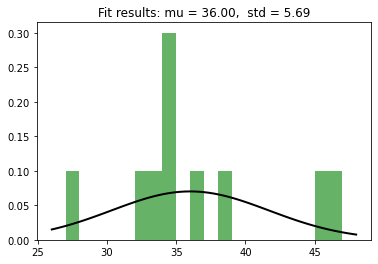

In [84]:
mu, std = norm.fit(w6)
plt.hist(w6, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

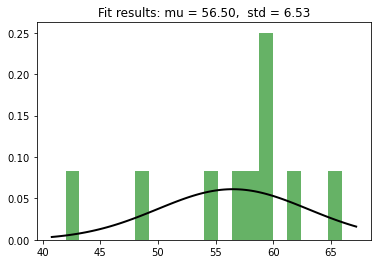

In [85]:
mu, std = norm.fit(l6)
plt.hist(l6, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

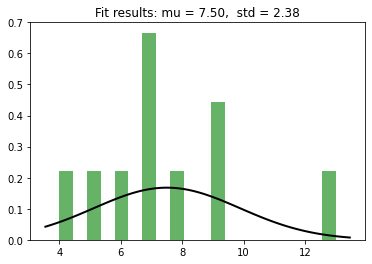

In [86]:
mu, std = norm.fit(d6)
plt.hist(d6, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [87]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset() 
    a=[]
    b=[]
    for j in range(4,22):
        if j==state_1[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=model.predict(c)
    y=model.predict(e)
    if x[0][0]<=y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200


In [88]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,10,1,0.25,0.75,0.0
1,9,1,0.25,0.75,0.0
2,20,0,0.714286,0.114286,0.171429
3,19,0,0.545455,0.363636,0.090909
4,13,1,0.233333,0.666667,0.1
5,6,1,0.3,0.7,0.0
6,12,1,0.05,0.95,0.0
7,18,1,0.0,1.0,0.0
8,15,1,0.095238,0.904762,0.0
9,17,1,0.0,1.0,0.0


<AxesSubplot:xlabel='Sum', ylabel='Win'>

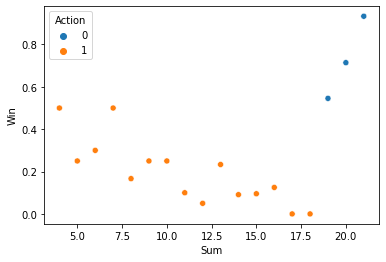

In [89]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

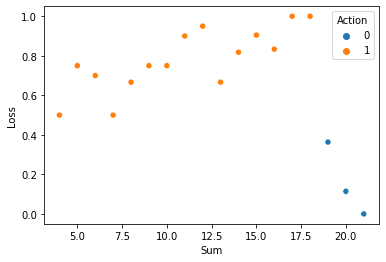

In [90]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

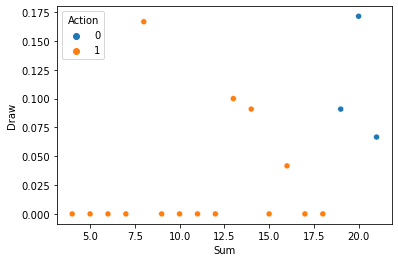

In [91]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

# Model 3

In [97]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32))
model.add(Dropout(0.9))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1280      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 27        
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
____________________________________________________

In [98]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,Y,epochs=20,validation_split=0.2)

Epoch 1/20
111/111 [==============================] - 2s 11ms/step - loss: 0.2125 - accuracy: 0.4861 - val_loss: 0.2076 - val_accuracy: 0.5006
Epoch 2/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1897 - accuracy: 0.5380 - val_loss: 0.1978 - val_accuracy: 0.5141
Epoch 3/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1881 - accuracy: 0.5444 - val_loss: 0.1866 - val_accuracy: 0.5243
Epoch 4/20
111/111 [==============================] - 1s 8ms/step - loss: 0.1842 - accuracy: 0.5478 - val_loss: 0.1830 - val_accuracy: 0.5379
Epoch 5/20
111/111 [==============================] - 1s 9ms/step - loss: 0.1815 - accuracy: 0.5622 - val_loss: 0.1825 - val_accuracy: 0.5209
Epoch 6/20
111/111 [==============================] - 1s 9ms/step - loss: 0.1828 - accuracy: 0.5418 - val_loss: 0.1741 - val_accuracy: 0.5797
Epoch 7/20
111/111 [==============================] - 1s 9ms/step - loss: 0.1838 - accuracy: 0.5483 - val_loss: 0.1735 - val_accuracy: 0.5740
Epoch

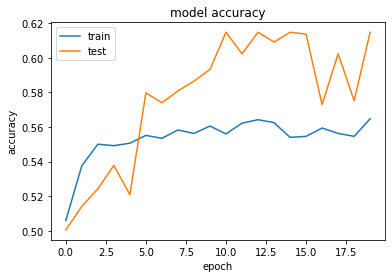

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

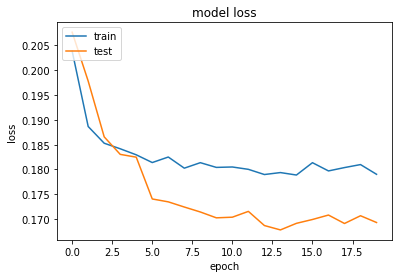

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
w7=[]
l7=[]
d7=[]
w7.append(0)
d7.append(0)
l7.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    state=state_1
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]<=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w7[len(w7)-1]+=1
    elif reward==0:
        d7[len(d7)-1]+=1
    else:
        l7[len(l7)-1]+=1
    if i%100==0 and i!=0:
        w7.append(0)
        d7.append(0)
        l7.append(0)
print(w7,l7,d7)

[22, 29, 26, 23, 20, 21, 31, 29, 22, 20] [72, 66, 65, 70, 75, 74, 66, 67, 73, 74] [7, 5, 9, 7, 5, 5, 3, 4, 5, 5]


In [102]:
print( '\n Skewness for data : ', skew(w7))
print( '\n Skewness for data : ', skew(l7))
print( '\n Skewness for data : ', skew(d7))


 Skewness for data :  0.4919840186112371

 Skewness for data :  -0.14707644836958808

 Skewness for data :  0.6954284341516428


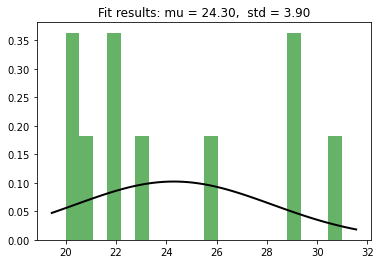

In [103]:
mu, std = norm.fit(w7)
plt.hist(w7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

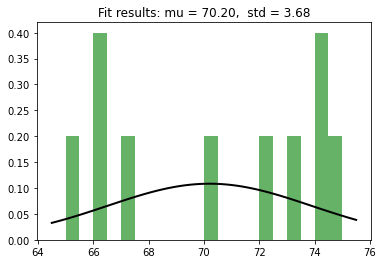

In [104]:
mu, std = norm.fit(l7)
plt.hist(l7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

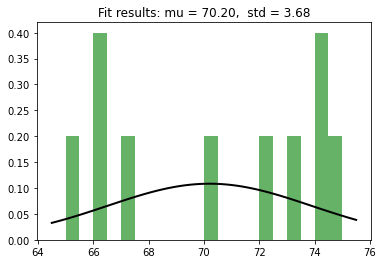

In [105]:
mu, std = norm.fit(l7)
plt.hist(l7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

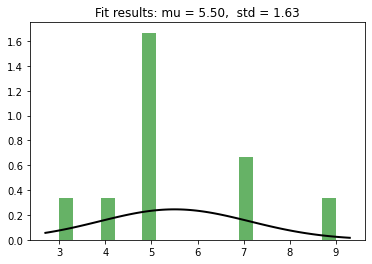

In [106]:
mu, std = norm.fit(d7)
plt.hist(d7, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [107]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,300):
    state_1=env.reset() 
    a=[]
    b=[]
    for j in range(4,22):
        if j==state_1[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=model.predict(c)
    y=model.predict(e)
    if x[0][0]<=y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]>=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200


In [108]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,14,1,0.178571,0.714286,0.107143
1,16,1,0.277778,0.666667,0.055556
2,4,1,0.0,1.0,0.0
3,19,0,0.428571,0.428571,0.142857
4,17,1,0.2,0.733333,0.066667
5,21,1,0.5,0.5,0.0
6,15,1,0.125,0.791667,0.083333
7,9,1,0.25,0.75,0.0
8,18,1,0.090909,0.863636,0.045455
9,11,1,0.384615,0.615385,0.0


<AxesSubplot:xlabel='Sum', ylabel='Win'>

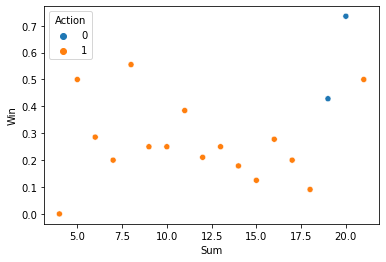

In [109]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

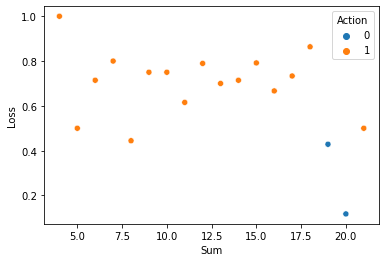

In [110]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

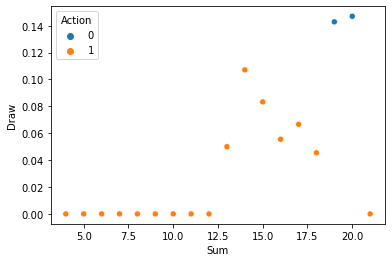

In [111]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

# Decission tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf =  DecisionTreeClassifier(max_depth=5,random_state=0)
clf.fit(X,Y)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [10]:
text_representation = sklearn.tree.export_text(clf)
print(text_representation)

|--- feature_18 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_17 <= 0.50
|   |   |   |--- feature_15 <= 0.50
|   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_17 >  0.50
|   |   |   |--- class: 1
|   |--- feature_16 >  0.50
|   |   |--- class: 0
|--- feature_18 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_14 >  0.50
|   |   |   |   |--- class: 2
|   |   |--- feature_15 >  0.50
|   |   |   |--- class: 2
|   |--- feature_16 >  0.50
|   |   |--- class: 2



In [114]:
w8=[]
l8=[]
d8=[]
w8.append(0)
d8.append(0)
l8.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    state=state_1
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]<=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w8[len(w8)-1]+=1
    elif reward==0:
        d8[len(d8)-1]+=1
    else:
        l8[len(l8)-1]+=1
    if i%100==0 and i!=0:
        print(i)
        w8.append(0)
        d8.append(0)
        l8.append(0)
print(w8,l8,d8)

100
200
300
400
500
600
700
800
900
[31, 21, 26, 33, 22, 28, 25, 20, 22, 19] [65, 76, 70, 60, 73, 64, 69, 72, 76, 77] [5, 3, 4, 7, 5, 8, 6, 8, 2, 3]


In [115]:
print( '\n Skewness for data : ', skew(w8))
print( '\n Skewness for data : ', skew(l8))
print( '\n Skewness for data : ', skew(d8))


 Skewness for data :  0.521608250059943

 Skewness for data :  -0.4414271356666275

 Skewness for data :  0.08124269304737164


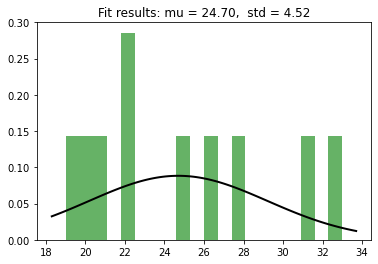

In [116]:
mu, std = norm.fit(w8)
plt.hist(w8, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

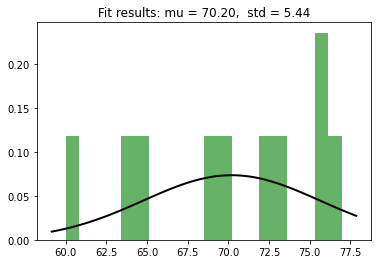

In [117]:
mu, std = norm.fit(l8)
plt.hist(l8, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

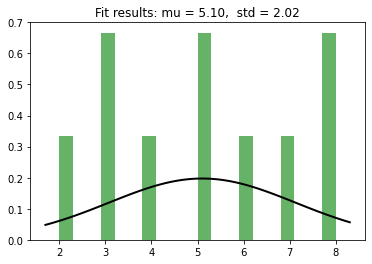

In [118]:
mu, std = norm.fit(d8)
plt.hist(d8, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [11]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset()   
    state=state_1
    a=[]
    b=[]
    for j in range(4,22):
        if j==state[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=clf.predict(c)
    y=clf.predict(e)
    if x[0][0]<=y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]<=y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900


In [12]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,12,1,0.204819,0.746988,0.048193
1,20,0,0.72807,0.122807,0.149123
2,19,0,0.615385,0.215385,0.169231
3,18,0,0.47619,0.365079,0.15873
4,15,1,0.247059,0.729412,0.023529
5,13,1,0.227273,0.727273,0.045455
6,14,1,0.158537,0.804878,0.036585
7,9,1,0.428571,0.52381,0.047619
8,11,1,0.160714,0.785714,0.053571
9,17,1,0.109375,0.828125,0.0625


<AxesSubplot:xlabel='Sum', ylabel='Win'>

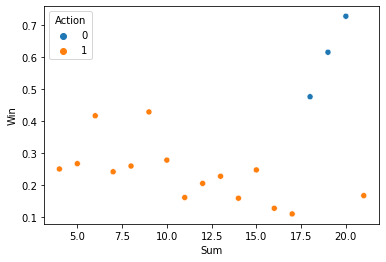

In [13]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

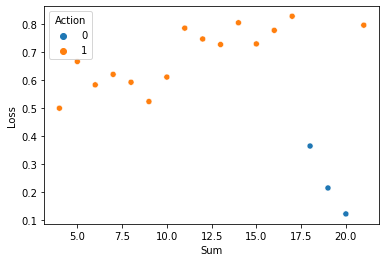

In [14]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

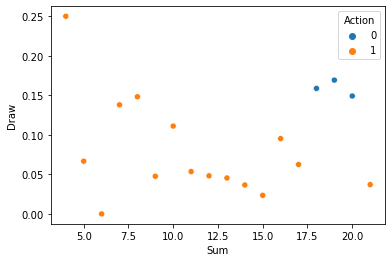

In [15]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

In [16]:
clf =  DecisionTreeClassifier(max_depth=7,random_state=0)
clf.fit(X,Y)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [17]:
text_representation = sklearn.tree.export_text(clf)
print(text_representation)

|--- feature_18 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_17 <= 0.50
|   |   |   |--- feature_15 <= 0.50
|   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_17 >  0.50
|   |   |   |--- class: 1
|   |--- feature_16 >  0.50
|   |   |--- class: 0
|--- feature_18 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- clas

In [18]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset()   
    state=state_1
    a=[]
    b=[]
    for j in range(4,22):
        if j==state[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=clf.predict(c)
    y=clf.predict(e)
    if x[0][0]<y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]<y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900


<AxesSubplot:xlabel='Sum', ylabel='Win'>

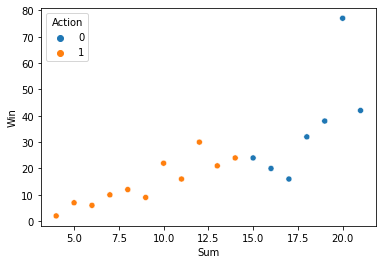

In [19]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

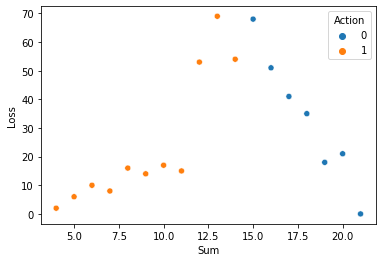

In [20]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

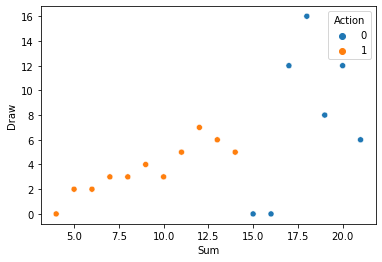

In [21]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

In [130]:
w9=[]
l9=[]
d9=[]
w9.append(0)
d9.append(0)
l9.append(0)
for i in range(0,1000):
    state_1=env.reset()   
    state=state_1
    a=[]
    b=[]
    for j in range(4,22):
        if j==state[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=clf.predict(c)
    y=clf.predict(e)
    if x[0][0]<y[0][0]:
        state,reward,is_done,info=env.step(1)
    else:
        state,reward,is_done,info=env.step(0)
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)

        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]<y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w9[len(w9)-1]+=1
    elif reward==0:
        d9[len(d9)-1]+=1
    else:
        l9[len(l9)-1]+=1
    if i%100==0 and i!=0:
        w9.append(0)
        d9.append(0)
        l9.append(0)
print(w9,l9,d9)

[36, 44, 42, 45, 39, 48, 35, 41, 46, 45] [56, 50, 51, 45, 52, 42, 53, 49, 43, 48] [9, 6, 7, 10, 9, 10, 12, 10, 11, 6]


In [131]:
print( '\n Skewness for data : ', skew(w9))
print( '\n Skewness for data : ', skew(l9))
print( '\n Skewness for data : ', skew(d9))


 Skewness for data :  -0.425968490772849

 Skewness for data :  -0.16469761643928701

 Skewness for data :  -0.32399316381636445


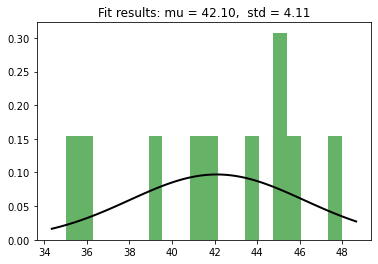

In [132]:
mu, std = norm.fit(w9)
plt.hist(w9, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

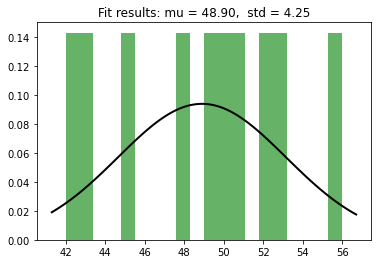

In [133]:
mu, std = norm.fit(l9)
plt.hist(l9, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

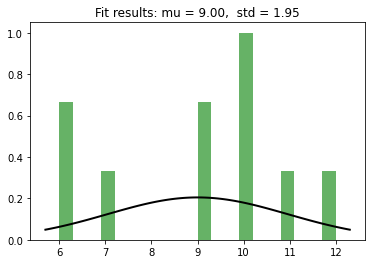

In [134]:
mu, std = norm.fit(d9)
plt.hist(d9, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# SVC

In [22]:
from sklearn.svm import SVR
from sklearn.multiclass import OneVsRestClassifier
svc=OneVsRestClassifier(SVR(C=1.0))
svc.fit(X,Y)

OneVsRestClassifier(estimator=SVR())

In [29]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset()   
    state=state_1
    a=[]
    b=[]
    for j in range(4,22):
        if j==state[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=clf.predict(c)
    y=clf.predict(e)
    if x[0][0]<y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=clf.predict(c)
        y=clf.predict(e)
        if x[0][0]<y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900


In [30]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,20,0,0.663717,0.150442,0.185841
1,8,1,0.4375,0.5,0.0625
2,15,0,0.375,0.625,0.0
3,12,1,0.35514,0.551402,0.093458
4,17,0,0.294118,0.632353,0.073529
5,14,1,0.317073,0.646341,0.036585
6,11,1,0.571429,0.357143,0.071429
7,16,0,0.264706,0.735294,0.0
8,19,0,0.509434,0.320755,0.169811
9,6,1,0.3,0.7,0.0


<AxesSubplot:xlabel='Sum', ylabel='Win'>

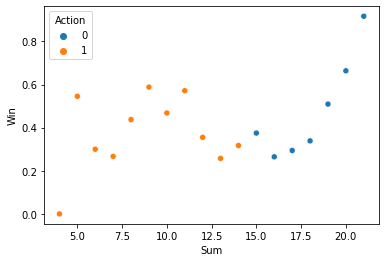

In [31]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

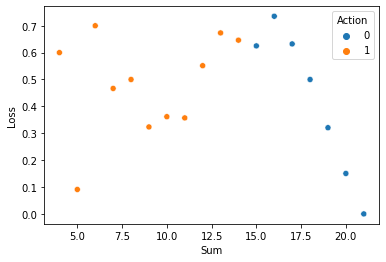

In [32]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

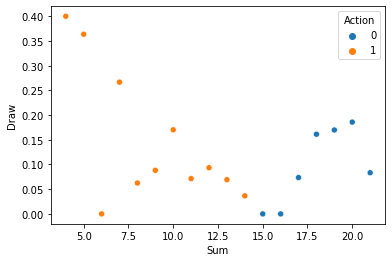

In [33]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

In [141]:
w10=[]
l10=[]
d10=[]
w10.append(0)
d10.append(0)
l10.append(0)
for i in range(0,1000):
    state_1=env.reset()   
    state=state_1
    a=[]
    b=[]
    for j in range(4,22):
        if j==state[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=model.predict(c)
    y=model.predict(e)
    if x[0][0]>y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]>y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w10[len(w10)-1]+=1
    elif reward==0:
        d10[len(d10)-1]+=1
    else:
        l10[len(l10)-1]+=1
    if i%100==0 and i!=0:
        w10.append(0)
        d10.append(0)
        l10.append(0)
print(w10,l10,d10)

[26, 31, 31, 29, 25, 22, 21, 37, 28, 26] [74, 69, 67, 67, 73, 75, 76, 62, 71, 71] [1, 0, 2, 4, 2, 3, 3, 1, 1, 2]


In [142]:
print( '\n Skewness for data : ', skew(w10))
print( '\n Skewness for data : ', skew(l10))
print( '\n Skewness for data : ', skew(d10))


 Skewness for data :  0.4716468934049465

 Skewness for data :  -0.5595141924952377

 Skewness for data :  0.19656578373781386


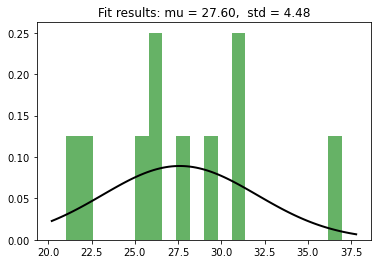

In [143]:
mu, std = norm.fit(w10)
plt.hist(w10, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

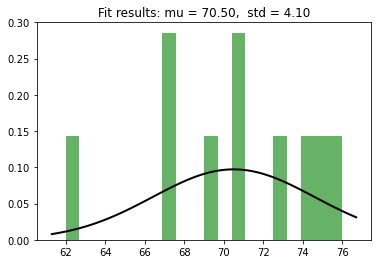

In [144]:
mu, std = norm.fit(l10)
plt.hist(l10, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

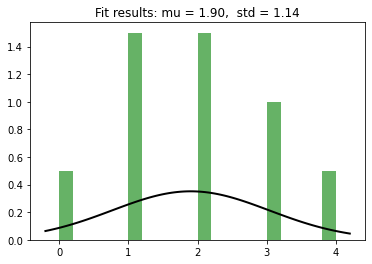

In [145]:
mu, std = norm.fit(d10)
plt.hist(d10, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X, Y)

OneVsRestClassifier(estimator=GaussianNB())

In [35]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset()   
    state=state_1
    a=[]
    b=[]
    for j in range(4,22):
        if j==state[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=clf.predict(c)
    y=clf.predict(e)
    if x[0][0]<y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]<y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900


In [36]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,21,0,0.863636,0.0,0.136364
1,15,0,0.352941,0.647059,0.0
2,13,0,0.237113,0.762887,0.0
3,10,0,0.205128,0.794872,0.0
4,17,0,0.291667,0.597222,0.111111
5,18,1,0.1875,0.796875,0.015625
6,8,0,0.24,0.76,0.0
7,12,0,0.333333,0.666667,0.0
8,16,0,0.223529,0.776471,0.0
9,19,0,0.545455,0.318182,0.136364


<AxesSubplot:xlabel='Sum', ylabel='Win'>

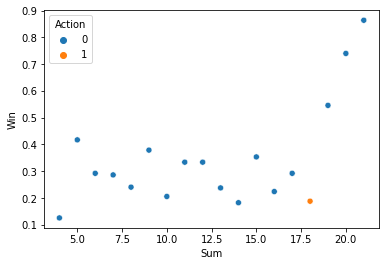

In [37]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

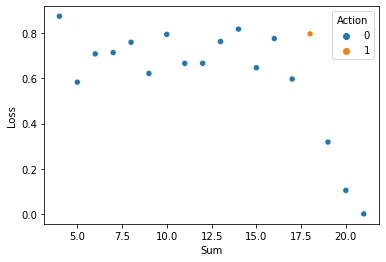

In [38]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

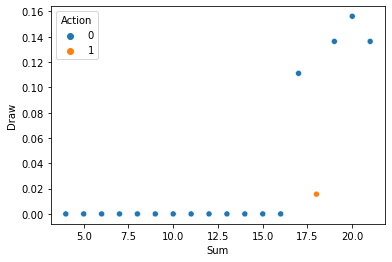

In [39]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

In [152]:
w11=[]
l11=[]
d11=[]
w11.append(0)
d11.append(0)
l11.append(0)
for i in range(0,1000):
    state_1=env.reset()
    state=state_1
    is_done=False
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]<y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if reward==1:
        w11[len(w11)-1]+=1
    elif reward==0:
        d11[len(d11)-1]+=1
    else:
        l11[len(l11)-1]+=1
    if i%100==0 and i!=0:
        print(i)
        w11.append(0)
        d11.append(0)
        l11.append(0)
print(w11,l11,d11)

100
200
300
400
500
600
700
800
900
[25, 24, 18, 26, 16, 22, 20, 27, 24, 25] [65, 70, 76, 65, 74, 74, 71, 65, 67, 71] [11, 6, 6, 9, 10, 4, 9, 8, 9, 3]


In [153]:
print( '\n Skewness for data : ', skew(w11))
print( '\n Skewness for data : ', skew(l11))
print( '\n Skewness for data : ', skew(d11))


 Skewness for data :  -0.6909794190409901

 Skewness for data :  0.060200675644575666

 Skewness for data :  -0.4608


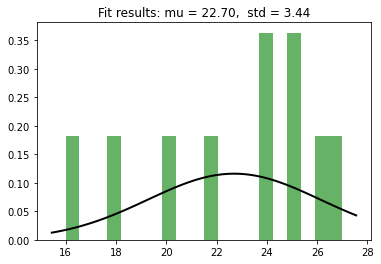

In [154]:
mu, std = norm.fit(w11)
plt.hist(w11, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

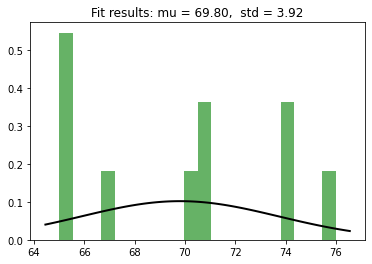

In [155]:
mu, std = norm.fit(l11)
plt.hist(l11, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

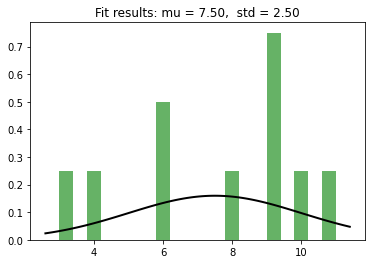

In [156]:
mu, std = norm.fit(d11)
plt.hist(d11, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [157]:
scipy.stats.ttest_1samp(w2,popmean=38.57)

Ttest_1sampResult(statistic=-20.017771448464135, pvalue=9.008672177548438e-09)

In [158]:
df=pd.DataFrame(columns=["Sum","Action","Win","Loss","Draw"])
for i in range(0,1000):
    state_1=env.reset()   
    state=state_1
    a=[]
    b=[]
    for j in range(4,22):
        if j==state[0]:
            a.append(1)
            b.append(1)
        else:
            a.append(0)
            b.append(0)

    a.append(1)
    b.append(0)
    c=[a]
    e=[b]
    c=np.array(c)
    e=np.array(e)
    x=model.predict(c)
    y=model.predict(e)
    if x[0][0]>y[0][0]:
        state,reward,is_done,info=env.step(1)
        action=1
    else:
        state,reward,is_done,info=env.step(0)
        action=0
    while is_done==False:
        a=[]
        b=[]
        for j in range(4,22):
            if j==state[0]:
                a.append(1)
                b.append(1)
            else:
                a.append(0)
                b.append(0)
        
        a.append(1)
        b.append(0)
        c=[a]
        e=[b]
        c=np.array(c)
        e=np.array(e)
        x=model.predict(c)
        y=model.predict(e)
        if x[0][0]>y[0][0]:
            state,reward,is_done,info=env.step(1)
        else:
            state,reward,is_done,info=env.step(0)
    if len(df[(df['Sum']==state_1[0])&(df['Action']==action)])!=0:
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    else:
        df=df.append({"Sum":state_1[0],"Action":action,"Win":0,"Loss":0,"Draw":0},ignore_index=True)
        if reward==1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Win"]+=1
        elif reward==-1:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Loss"]+=1
        else:
            df.loc[(df['Sum']==state_1[0])&(df['Action']==action),"Draw"]+=1
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900


In [159]:
c=df.Win+df.Loss+df.Draw
df.Win=df.Win/c
df.Loss=df.Loss/c
df.Draw=df.Draw/c
df

,Sum,Action,Win,Loss,Draw
0,10,0,0.153846,0.846154,0.0
1,9,0,0.176471,0.823529,0.0
2,7,0,0.214286,0.785714,0.0
3,17,0,0.284091,0.511364,0.204545
4,13,0,0.16,0.84,0.0
5,12,0,0.271739,0.728261,0.0
6,20,1,0.086207,0.913793,0.0
7,21,0,0.881356,0.0,0.118644
8,18,0,0.465116,0.27907,0.255814
9,14,0,0.208791,0.791209,0.0


<AxesSubplot:xlabel='Sum', ylabel='Win'>

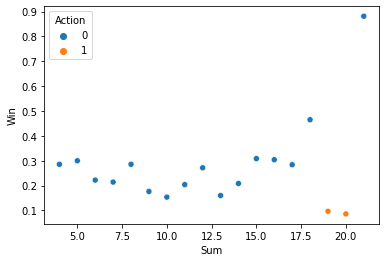

In [160]:
sns.scatterplot(x="Sum",y="Win",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Loss'>

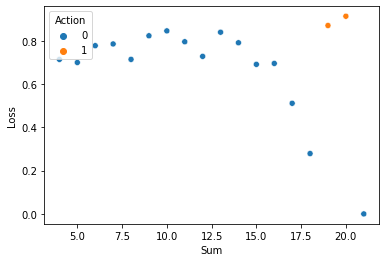

In [161]:
sns.scatterplot(x="Sum",y="Loss",hue="Action",data=df)

<AxesSubplot:xlabel='Sum', ylabel='Draw'>

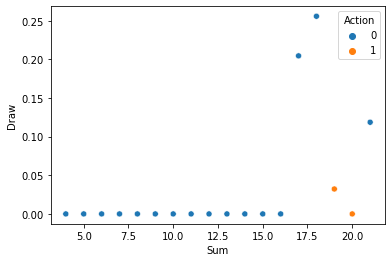

In [162]:
sns.scatterplot(x="Sum",y="Draw",hue="Action",data=df)

## Random

In [163]:
w20=[]
l20=[]
d20=[]
w20.append(0)
d20.append(0)
l20.append(0)
for i in range(0,1000):
    state_1=env.reset()
    is_done=False
    while is_done==False:
        a=env.action_space.sample()
        state,reward,is_done,info=env.step(a)
    if reward==1:
        w20[len(w20)-1]+=1
    elif reward==0:
        d20[len(d20)-1]+=1
    else:
        l20[len(l20)-1]+=1
    if i%100==0 and i!=0:
        w20.append(0)
        d20.append(0)
        l20.append(0)
print(w20,l20,d20)

[25, 23, 30, 33, 30, 23, 27, 22, 27, 27] [69, 71, 67, 60, 67, 73, 65, 76, 71, 65] [7, 6, 3, 7, 3, 4, 8, 2, 2, 7]


In [164]:
print( '\n Skewness for data : ', skew(w20))
print( '\n Skewness for data : ', skew(l20))
print( '\n Skewness for data : ', skew(d20))


 Skewness for data :  0.29049216489432605

 Skewness for data :  -0.12652750263604062

 Skewness for data :  -0.03995033801045654


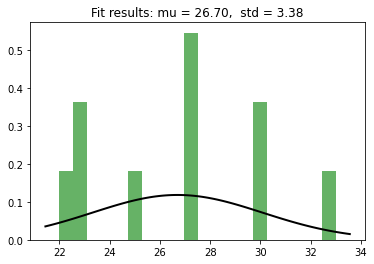

In [165]:
mu, std = norm.fit(w20)
plt.hist(w20, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

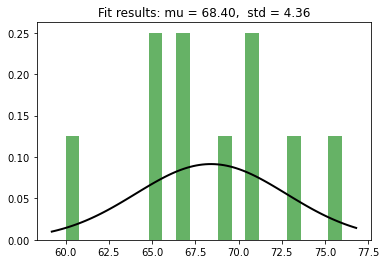

In [166]:
mu, std = norm.fit(l20)
plt.hist(l20, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

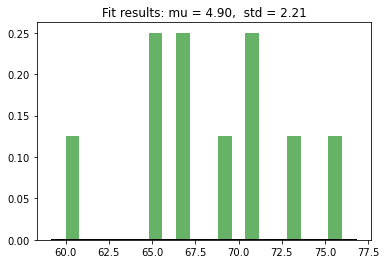

In [167]:
mu, std = norm.fit(d20)
plt.hist(l20, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()